In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

1. Загрузка данных: Загрузить датасет Covertype, состоящий из различных признаков, таких как высота над уровнем моря, угол наклона, горизонтальное и вертикальное расстояние к воде и т.д.

In [ ]:
data = pd.read_csv("covtype.csv")

In [ ]:
data.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235,151,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238,135,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238,122,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234,150,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
5,2579,132,6,300,-15,67,230,237,140,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,2606,45,7,270,5,633,222,225,138,6256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
7,2605,49,4,234,7,573,222,230,144,6228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,2617,45,9,240,56,666,223,221,133,6244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,2612,59,10,247,11,636,228,219,124,6230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


2. Изучение данных: Изучить описание датасета, чтобы понять, какие признаки содержатся в данных и какие значения они принимают.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

3. Предварительная обработка данных: Провести предварительную обработку данных, включающую удаление выбросов, заполнение пропущенных значений (если есть) и масштабирование признаков.

In [ ]:
print("Пропущенные значения","\n",data.isnull().sum())
print("Дубликаты",data.duplicated().sum())

Пропущенные значения 
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11      

In [ ]:
q1 = data['Aspect'].quantile(0.25)
q3 = data['Aspect'].quantile(0.75)
iqr = q3 - q1
data = data[(data['Aspect'] > (q1 - 1.5 * iqr)) & (data['Aspect'] < (q3 + 1.5 * iqr))]

In [ ]:
data = data.fillna(data.mean())
data.to_csv('covtype1.csv', index=False)
print("Пропущенные значения","\n",data.isnull().sum())

Пропущенные значения 
 Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11      

In [ ]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

4. Исследовательский анализ данных: Визуализировать данные с помощью графиков и диаграмм, чтобы лучше понять распределение каждого признака и его связь с целевой переменной (типом биома).

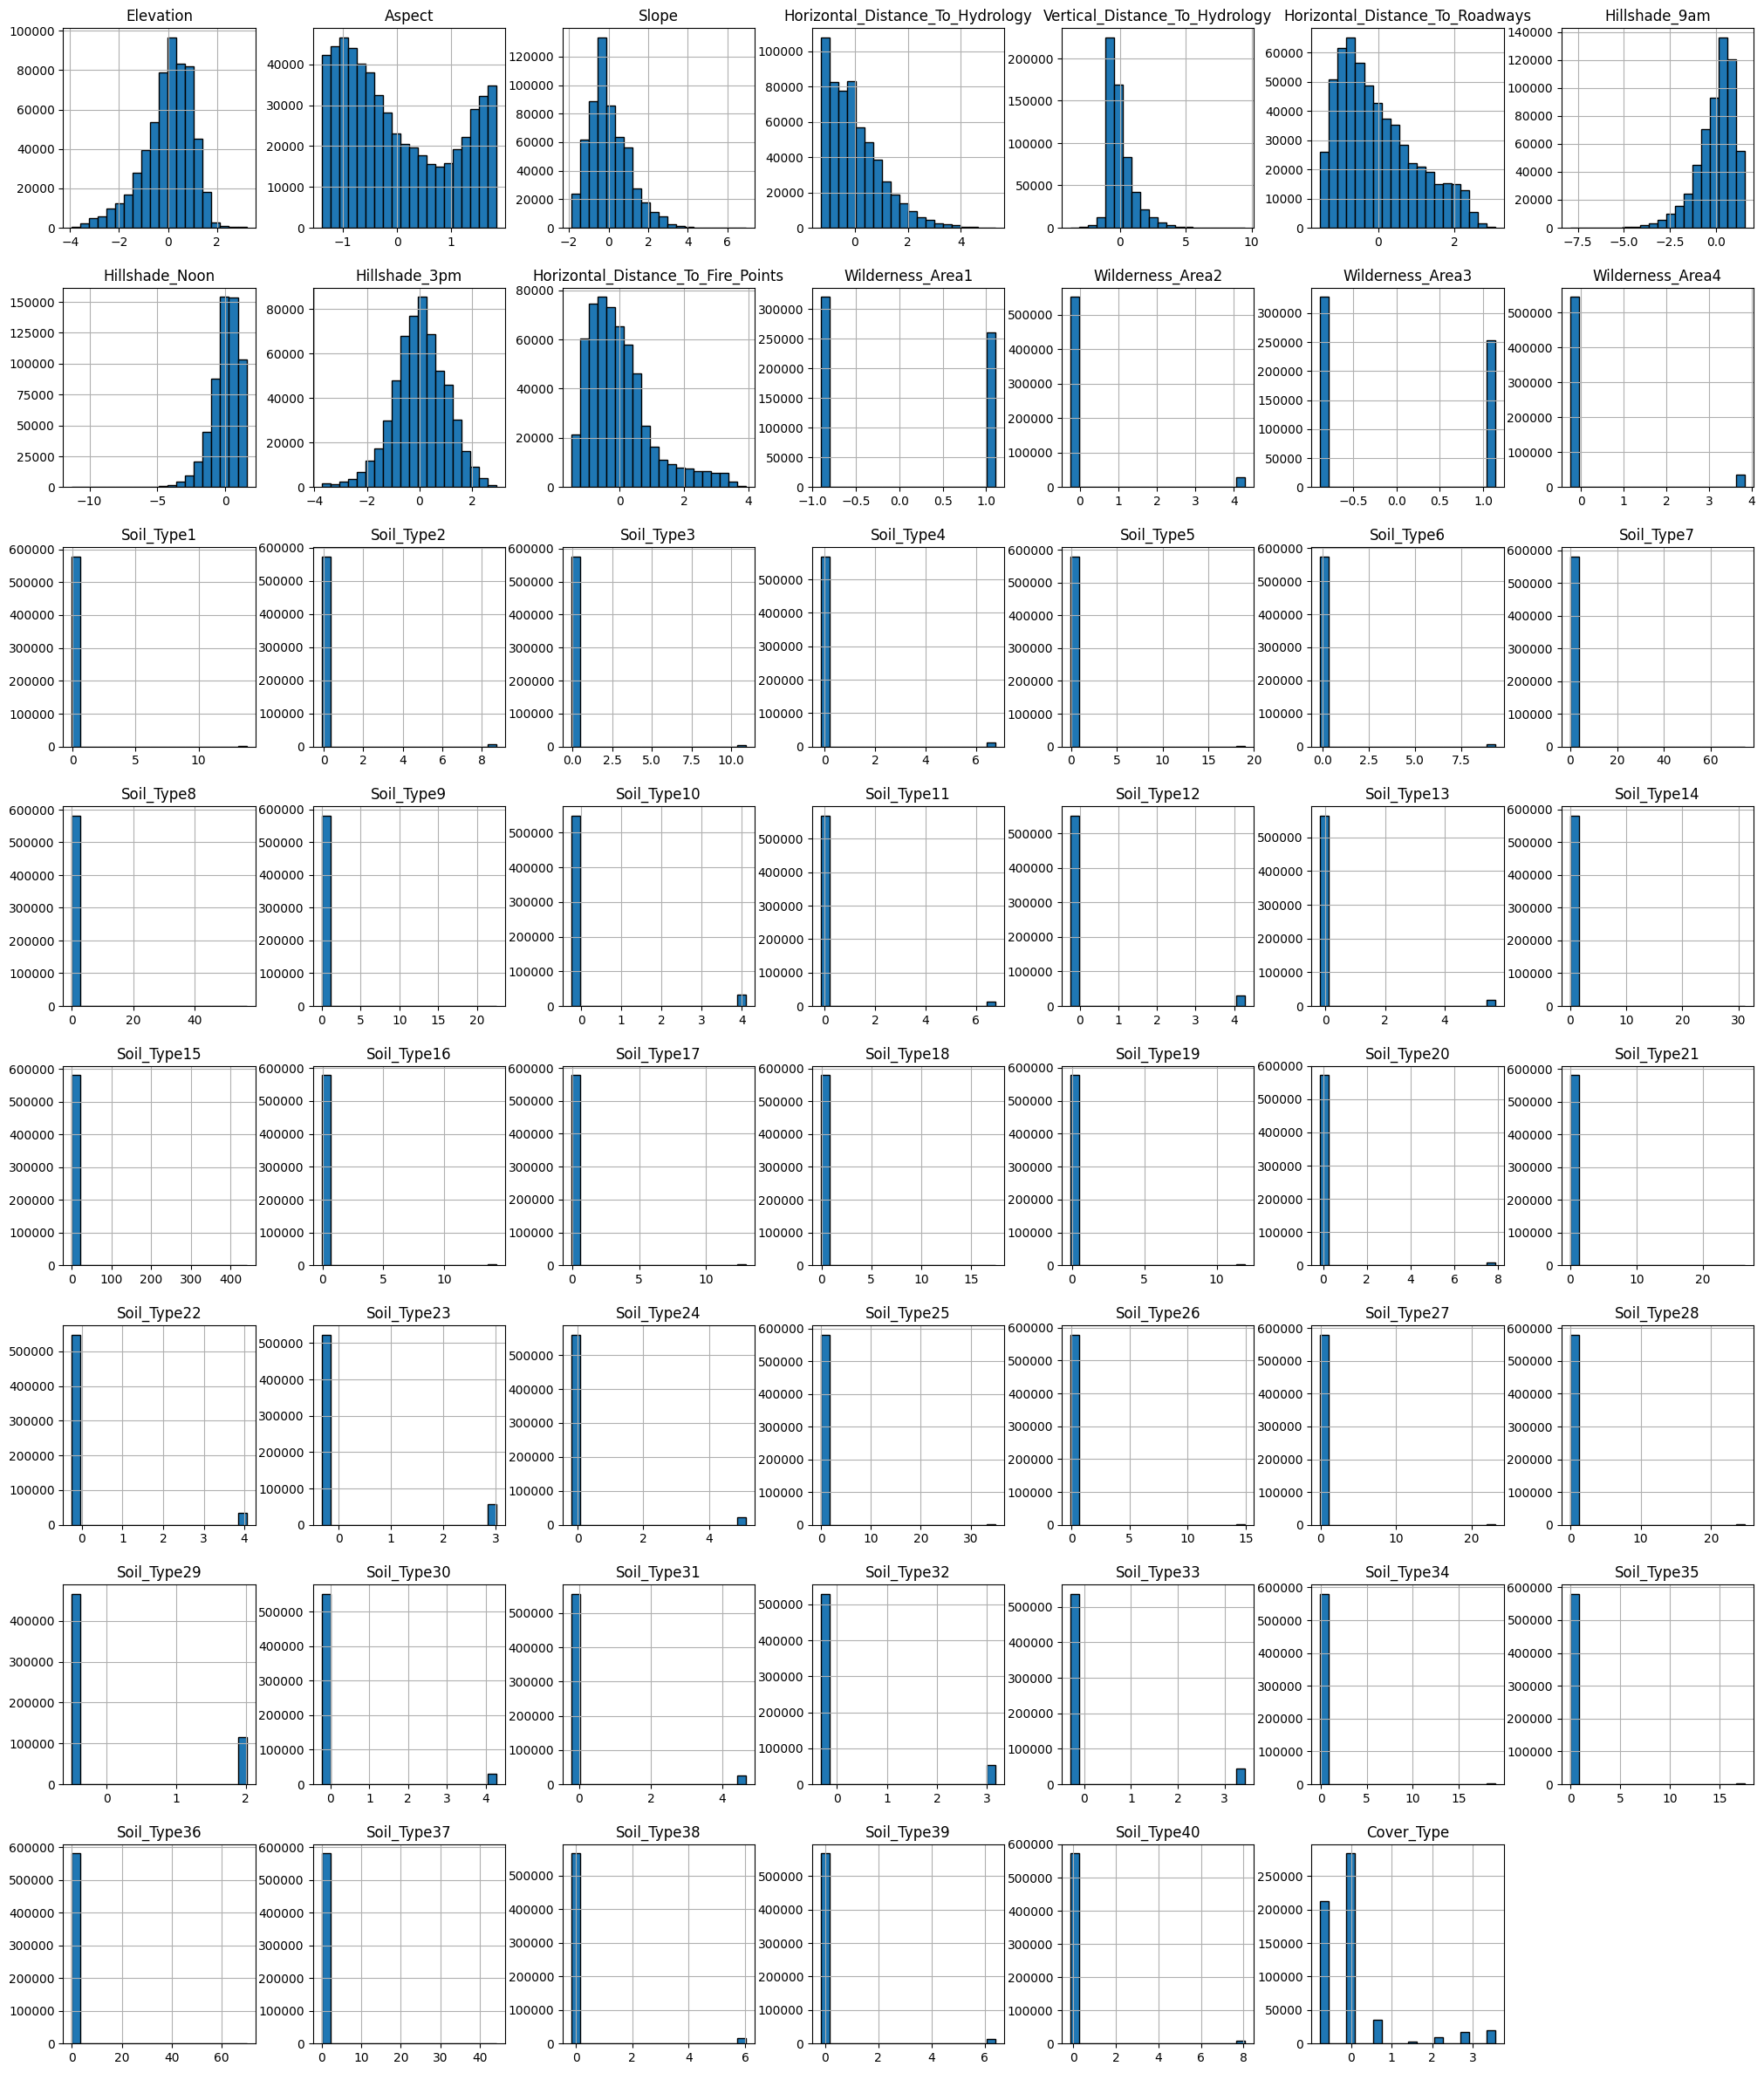

In [ ]:
#Визуализация распределения каждого признака
data.hist(bins=20, figsize=(25,30), edgecolor='k')
plt.show()

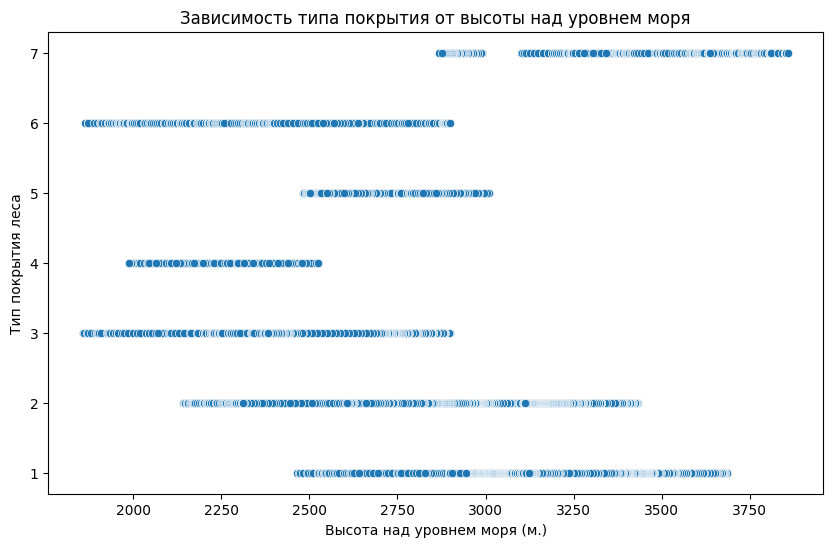

In [ ]:
#Связь с целевой переменной
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Elevation', y='Cover_Type', data=data)
plt.title('Зависимость типа покрытия от высоты над уровнем моря')
plt.xlabel('Высота над уровнем моря (м.)')
plt.ylabel('Тип покрытия леса')
plt.show()

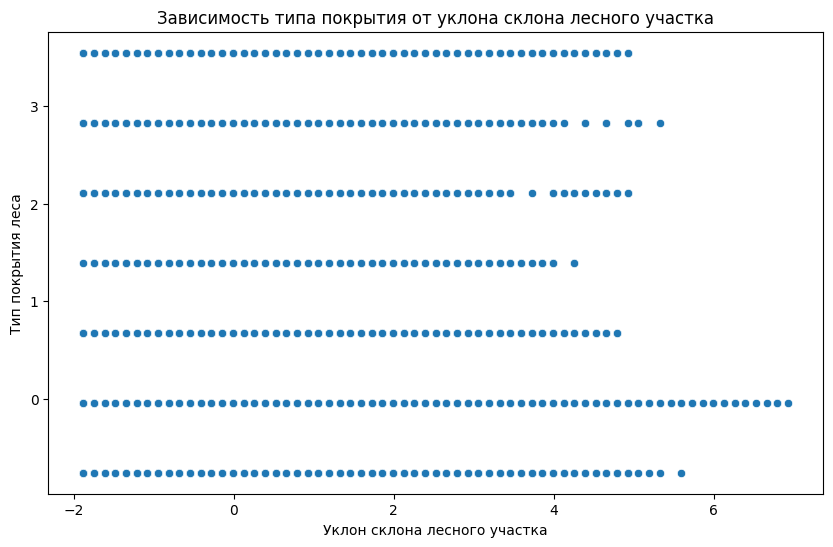

In [ ]:
#Связь с целевой переменной
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Slope', y='Cover_Type', data=data)
plt.title('Зависимость типа покрытия от уклона склона лесного участка')
plt.xlabel('Уклон склона лесного участка')
plt.ylabel('Тип покрытия леса')
plt.show()

5. Выбор признаков: Определить наиболее значимые признаки с помощью анализа важности признаков, например, используя метод случайного леса.

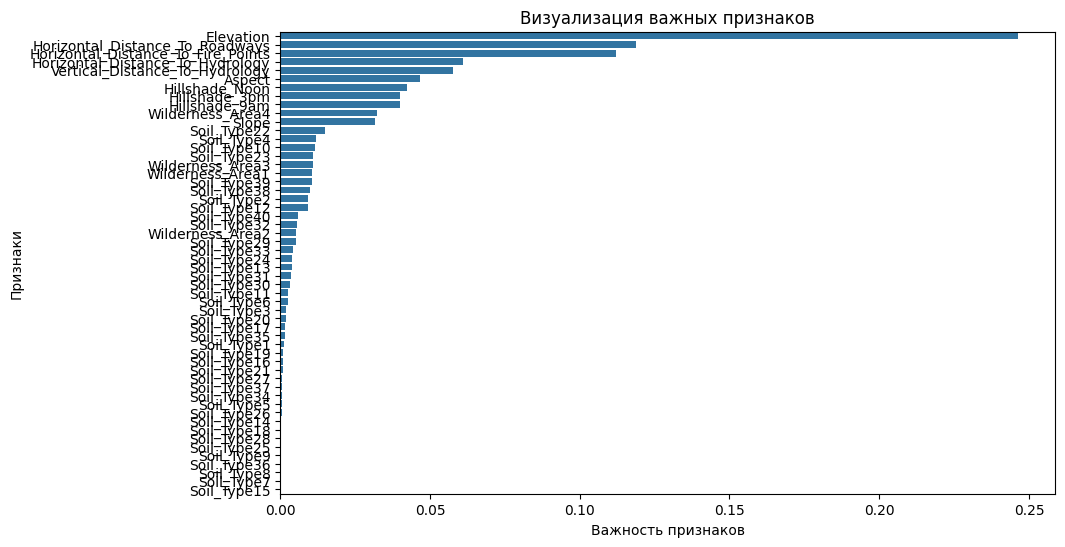

In [ ]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

clf = RandomForestClassifier()
clf.fit(X, y)

feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

6. Разделение данных: Разделить данные на обучающую и тестовую выборки

In [ ]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 406708
Размер тестовой выборки: 174304


7. Построение модели: Выбрать подходящий алгоритм классификации, такой как случайный лес, логистическая регрессия или метод k-ближайших соседей.



In [ ]:
clf = RandomForestClassifier()


8. Обучение модели: Обучите выбранную модель на обучающих данных, используя настроенные параметры или подбор их с помощью кросс-валидации.

In [ ]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


9. Оценка производительности модели: Оценить производительность модели на тестовых данных, используя метрики классификации, такие как точность, полнота и F1-мера.



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9521353497337984
Precision: 0.9522469868573775
Recall: 0.9521353497337984
F1 Score: 0.9518736654346132


10. Настройку модели: Попробовать улучшить производительность модели, выполнив настройку ее гиперпараметров, например, с помощью метода перебора сетки или случайного поиска.

11. Оценка важности признаков: Оценить важность признаков в модели, чтобы определить, какие признаки наиболее сильно влияют на предсказания.

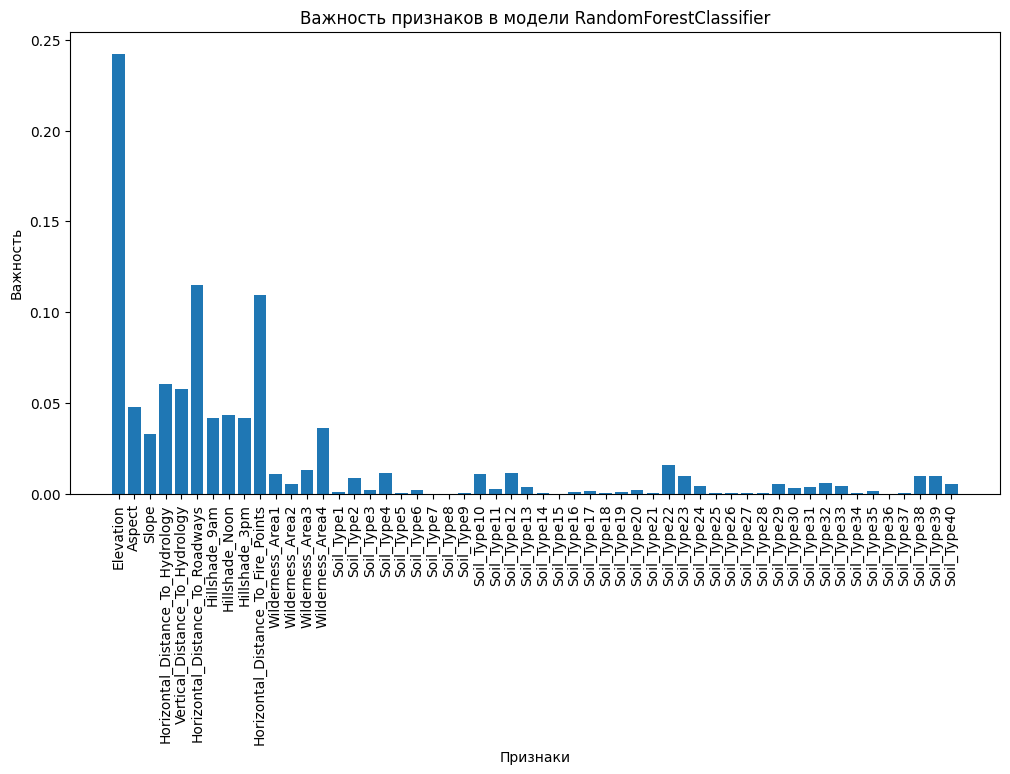

In [ ]:

feature_importances = clf.feature_importances_


feature_names = X_train.columns


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

12. Повторение: Повторить шаги 7-11 с использованием других алгоритмов классификации, чтобы сравнить их производительность и выбрать наилучшую модель.

13. Оценка переобучения: Оценить уровень переобучения модели, проведя анализ ошибок и разницу между производительностью на обучающей и тестовой выборках.

In [ ]:
# Предсказание на обучающей выборке
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Предсказание на тестовой выборке
test_accuracy = accuracy

print("Точность на обучающей выборке:", train_accuracy)
print("Точность на тестовой выборке:", test_accuracy)

# Разница в точности между обучающей и тестовой выборками
accuracy_diff = train_accuracy - test_accuracy
print("Разница в точности между обучающей и тестовой выборками:", accuracy_diff)

Точность на обучающей выборке: 1.0
Точность на тестовой выборке: 0.9517567009362952
Разница в точности между обучающей и тестовой выборками: 0.048243299063704836


14. Оценка результатов: Оцените результаты модели, проанализировав полученные значения метрик классификации и интерпретируя их в контексте задачи классификации типов биома.